### Brute Force

A Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a cycle that visits each vertex exactly once. A Hamiltonian path that starts and ends at adjacent vertices can be completed by adding one more edge to form a Hamiltonian cycle and removing any edge from a Hamiltonian cycle produces a Hamiltonian path.
(https://en.wikipedia.org/wiki/Hamiltonian_path)

#### Write a program to
1. Determine whether a given graph has a path from given u to given v or not ($Path(u,v)$). If there is a path, print that path.
2. Check whether a given graph has a Hamiltonian path/cycle. If there is a path/cycle, print that path/cycle.

    **Please note that Information will be provided by various sizes of adjacency Matrix**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(matrix):
    G = nx.DiGraph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(2,2))  
    nx.draw(G, pos,with_labels=True, node_color='skyblue', node_size=200, font_size=10)
    plt.show()

def draw_solution(matrix, paths, cycles=False):
    """
    Visualize a graph represented by an adjacency matrix and highlight multiple paths (show all paths)
    
    Parameters:
    - matrix (List[List[int]]): Adjacency matrix representing the graph.
                                 An entry of 1 at matrix[i][j] indicates an edge from node i to node j.
    - paths (List[List[int]]): List of paths, where each path is a list of nodes to be highlighted.
    """
    G = nx.DiGraph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    for path in paths:
        plt.figure(figsize=(2,2)) 
        # Draw the entire graph in a light color
        nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, edge_color='lightgray')
        # Highlight the solution path
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        if cycles:  # Check if the first and last nodes are connected
            edges.append((path[-1], path[0]))  # Add the edge to close the cycle
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
        plt.show()

def draw_current_path(matrix, path):
    """
    Visualize a graph represented by an adjacency matrix and highlight a single path.
    
    Parameters:
    - matrix (List[List[int]]): Adjacency matrix representing the graph.
                                 An entry of 1 at matrix[i][j] indicates an edge from node i to node j.
    - path (List[int]): Path of nodes to be highlighted.
    """
    G = nx.DiGraph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                G.add_edge(i, j)
    pos = nx.shell_layout(G)
    plt.figure(figsize=(2,2))
    # Draw the entire graph in light colors
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=200, font_size=10, edge_color='lightgray')
    # Highlight the current path
    edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
    plt.draw()
    plt.pause(1)  # Pause to observe the drawing

----
#### Find Path given u and v

In [2]:
tracks = []

In [3]:
def find_all_paths(matrix, start, end, path=[]):
    path = path + [start]
    global track
    tracks.append(path)
    
    # Base case: if the start is same as end, we found a path
    if start == end:
        return [path]
    paths = []  # to store all possible paths
    for i in range(len(matrix[start])):
        # if there's an edge and the node hasn't been visited yet
        if matrix[start][i] == 1 and i not in path:
            newpaths = find_all_paths(matrix, i, end, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

----

#### Check Hamiltonian path/cycle

In [4]:
def find_hamiltonian_paths(matrix):
    n = len(matrix) # Number of nodes
    hamiltonian_paths = []

    # For each pair of nodes, find all paths
    for start in range(n):
        for end in range(n):
            if start != end:
                paths = find_all_paths(matrix, start, end)
                # For each path, check if it's a Hamiltonian path
                for path in paths:
                    if len(path) == n:
                        hamiltonian_paths.append(path)
    
    return hamiltonian_paths

In [5]:
def find_hamiltonian_cycles(matrix):
    hamiltonian_paths = find_hamiltonian_paths(matrix)
    hamiltonian_cycles = []

    for path in hamiltonian_paths:
        # Check if start and end nodes of the path are connected
        if matrix[path[0]][path[-1]] == 1:
            hamiltonian_cycles.append(path)
    
    return hamiltonian_cycles

---

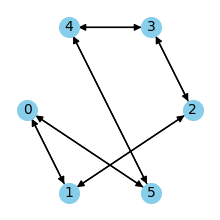

Hamiltonian paths: 12


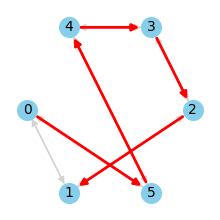

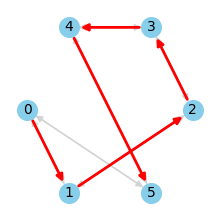

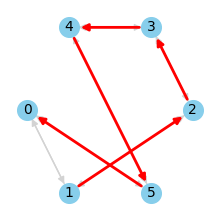

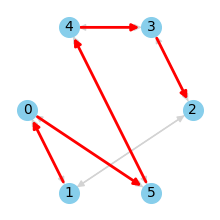

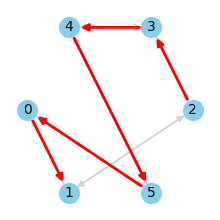

Hamiltonian cycles: 12


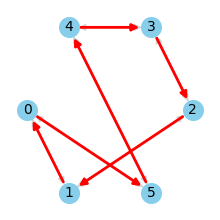

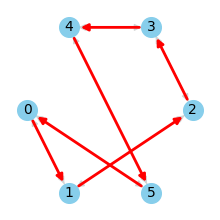

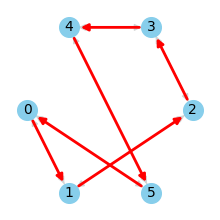

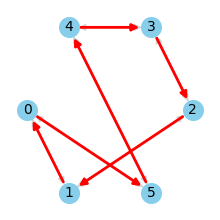

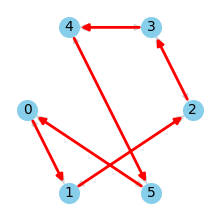

In [6]:
graph_matrix = [
    [0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0]
]
draw_graph(graph_matrix)

# paths = find_all_paths(graph_matrix, 0, 1)
# paths = remove_duplicate(paths)
# draw_solution(graph_matrix, paths)

paths = find_hamiltonian_paths(graph_matrix)
print(f"Hamiltonian paths: {len(paths)}")
draw_solution(graph_matrix, paths[:5])

cycles = find_hamiltonian_cycles(graph_matrix)
print(f"Hamiltonian cycles: {len(cycles)}")
draw_solution(graph_matrix, cycles[:5], cycles=True)
